In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

from mpl_toolkits.basemap import Basemap
import folium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (99.1 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1

     |████████████████████████████████| 2.8MB 8.6MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702118 sha256=93ea6e64306779421aeaff82a9b6d1326f669ba838e167161655ad29cd4a0e3d
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.0.0.post1
    Uninstalling pyproj-3.0.0.post1:
      Successfully uninstalled pyproj-3.0.0.post1


In [2]:
! wget https://raw.githubusercontent.com/micaelavillordo/Prueba/master/Entrenamieto_ECI_2020.csv

--2020-11-15 21:21:17--  https://raw.githubusercontent.com/micaelavillordo/Prueba/master/Entrenamieto_ECI_2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7622942 (7.3M) [text/plain]
Saving to: ‘Entrenamieto_ECI_2020.csv’

Entrenamieto_ECI_20 100%[===================>]   7.27M  --.-KB/s    in 0.1s    

2020-11-15 21:21:18 (61.2 MB/s) - ‘Entrenamieto_ECI_2020.csv’ saved [7622942/7622942]



In [3]:
entrenamiento = pd.read_csv('Entrenamieto_ECI_2020.csv')
entrenamiento

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [4]:
entrenamiento['Opportunity_Created_Date']=pd.to_datetime(entrenamiento['Opportunity_Created_Date'])
entrenamiento.dtypes
entrenamiento.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,NaT,10/7/2016,Person

In [5]:
entrenamiento['Año_oportunidad']=entrenamiento['Opportunity_Created_Date'].dt.strftime('%Y')
entrenamiento.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Año_oportunidad
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,2015
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,2015
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,2015
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,2015
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,2015
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None,2015
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2015-12-08,None,Non

In [6]:
won = entrenamiento[entrenamiento.Stage == 'Closed Won']
won

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Año_oportunidad
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.530,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.00,Closed Won,Prod_Category_A_None,2015
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.480,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.60,Closed Won,Prod_Category_A_None,2015
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-09,None,None,None,None,None,None,NaT,1/7/2016,12/9/2015,Person_Name_8,Product_Family_143,Product_Name_251,USD,0.480,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,50688.0,USD,50688.00,Closed Won,Prod_Category_A_None,2015
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,None,India,Account_Name_1147,Opportunity_Name_7036,11,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-09,None,None,None,None,None,None,NaT,3/31/2016,1/7/2016,Person_Name_49,Product_Family_73,Product_Name_84,USD,0.539,USD,0.53900,1/9/2016,1/15/2016,2016 - 1,Q1,2016,NaT,3,USD,1621851.0,USD,1621851.00,Closed Won,Prod_Category_A_None,2015
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_7,Germany,Account_Name_263,Opportunity_Name_4062,20,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,2015-12-09,None,None,None,None,None,None,NaT,1/8/2016,12/9/2015,Person_Name_13,Product_Family_77,Product_Name_100,EUR,0.530,USD,0.59948,1/18/2016,1/29/2016,2016 - 1,Q1,2016,NaT,0,EUR,103350.0,EUR,103350.00,Closed Won,Prod_Category_A_None,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,17683,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_4060,12797,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,2015-12-04,None,None,None,None,None,None,NaT,1/3/2016,12/18/2015,Person_Name_13,Product_Family_77,Product_Name_96,EUR,0.530,USD,0.59948,2/1/2016,2/29/2016,2016 - 2,Q1,2016,NaT,1,EUR,413400.0,EUR,528918.75,Closed Won,Prod_Category_A_None,2015
16939,18324,EMEA,Norway,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_7202,12799,224,Person_Name_

In [7]:
terr = won[won.Territory != 'None']
terr

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Año_oportunidad
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.480,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.60,Closed Won,Prod_Category_A_None,2015
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-09,None,None,None,None,None,None,NaT,1/7/2016,12/9/2015,Person_Name_8,Product_Family_143,Product_Name_251,USD,0.480,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,50688.0,USD,50688.00,Closed Won,Prod_Category_A_None,2015
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,None,India,Account_Name_1147,Opportunity_Name_7036,11,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-09,None,None,None,None,None,None,NaT,3/31/2016,1/7/2016,Person_Name_49,Product_Family_73,Product_Name_84,USD,0.539,USD,0.53900,1/9/2016,1/15/2016,2016 - 1,Q1,2016,NaT,3,USD,1621851.0,USD,1621851.00,Closed Won,Prod_Category_A_None,2015
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_7,Germany,Account_Name_263,Opportunity_Name_4062,20,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,2015-12-09,None,None,None,None,None,None,NaT,1/8/2016,12/9/2015,Person_Name_13,Product_Family_77,Product_Name_100,EUR,0.530,USD,0.59948,1/18/2016,1/29/2016,2016 - 1,Q1,2016,NaT,0,EUR,103350.0,EUR,103350.00,Closed Won,Prod_Category_A_None,2015
64,19342,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,8/22/2013,None,United States,Account_Name_1662,Opportunity_Name_6397,21,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2015-12-10,None,None,None,None,None,None,NaT,NaT,2/22/2017,Person_Name_33,Product_Family_80,Product_Name_94,USD,0.650,USD,0.65000,3/1/2016,3/31/2016,2016 - 3,Q1,2016,NaT,5,USD,3184974.0,USD,3184974.00,Closed Won,Prod_Category_A_None,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,17683,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_4060,12797,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,2015-12-04,None,None,None,None,None,None,NaT,1/3/2016,12/18/2015,Person_Name_13,Product_Family_77,Product_Name_96,EUR,0.530,USD,0.59948,2/1/2016,2/29/2016,2016 - 2,Q1,2016,NaT,1,EUR,413400.0,EUR,528918.75,Closed Won,Prod_Category_A_None,2015
16939,18324,EMEA,Norway,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_7202,12799,224,Pe

In [8]:

terr['Stage']=1
terr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Año_oportunidad
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.480,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.60,1,Prod_Category_A_None,2015
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-09,None,None,None,None,None,None,NaT,1/7/2016,12/9/2015,Person_Name_8,Product_Family_143,Product_Name_251,USD,0.480,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,50688.0,USD,50688.00,1,Prod_Category_A_None,2015
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,None,India,Account_Name_1147,Opportunity_Name_7036,11,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-09,None,None,None,None,None,None,NaT,3/31/2016,1/7/2016,Person_Name_49,Product_Family_73,Product_Name_84,USD,0.539,USD,0.53900,1/9/2016,1/15/2016,2016 - 1,Q1,2016,NaT,3,USD,1621851.0,USD,1621851.00,1,Prod_Category_A_None,2015
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_7,Germany,Account_Name_263,Opportunity_Name_4062,20,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,2015-12-09,None,None,None,None,None,None,NaT,1/8/2016,12/9/2015,Person_Name_13,Product_Family_77,Product_Name_100,EUR,0.530,USD,0.59948,1/18/2016,1/29/2016,2016 - 1,Q1,2016,NaT,0,EUR,103350.0,EUR,103350.00,1,Prod_Category_A_None,2015
64,19342,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,8/22/2013,None,United States,Account_Name_1662,Opportunity_Name_6397,21,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2015-12-10,None,None,None,None,None,None,NaT,NaT,2/22/2017,Person_Name_33,Product_Family_80,Product_Name_94,USD,0.650,USD,0.65000,3/1/2016,3/31/2016,2016 - 3,Q1,2016,NaT,5,USD,3184974.0,USD,3184974.00,1,Prod_Category_A_None,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,17683,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_4060,12797,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,2015-12-04,None,None,None,None,None,None,NaT,1/3/2016,12/18/2015,Person_Name_13,Product_Family_77,Product_Name_96,EUR,0.530,USD,0.59948,2/1/2016,2/29/2016,2016 - 2,Q1,2016,NaT,1,EUR,413400.0,EUR,528918.75,1,Prod_Category_A_None,2015
16939,18324,EMEA,Norway,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_7202,12799,224,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity

In [19]:
data1 = terr.groupby('Territory')['Año_oportunidad'].agg({lambda x: x.mode().iloc[0]})
data2 = terr.groupby('Territory').agg({'Stage':'sum'})
data = data1.join(data2)
data.columns = ['Año_oportunidad', 'Cant']
data

,Año_oportunidad,Cant
Territory,,
Australia,2017,696
Austria,2017,124
Belgium,2017,187
Bulgaria,2017,1
Cambodia,2017,2
Canada,2017,23
Carribean,2018,13
Central US,2017,104
China (PRC),2017,202


In [26]:
visu = data.nlargest(11, 'Cant')
visu

,Año_oportunidad,Cant
Territory,,
Germany,2017,1023
NW America,2017,973
Australia,2017,696
Japan,2017,546
India,2017,374
Singapore,2018,357
NE America,2017,259
Netherlands,2017,257
China (PRC),2017,202


Como "Belgium" y "SE America" poseen la misma cantidad de ventas, se elige uno de ambos para mostrar en el top 10 de la visualización.
(Eligiendo "SE America" por ser un territorio perteneciente a una gran potencia como lo es EE.UU.)

In [31]:
visu_final = visu.drop(['Belgium'], axis=0)

In [85]:
fila_para_referencia_grafico = visu_final.loc['SE America']
fila_para_referencia_grafico = fila_para_referencia_grafico.rename(index='None')
fila_para_referencia_grafico['Cant'] = 2900
fila_para_referencia_grafico['Año_oportunidad'] = 'None'

In [91]:
visu_final = visu_final.append(fila_para_referencia_grafico)

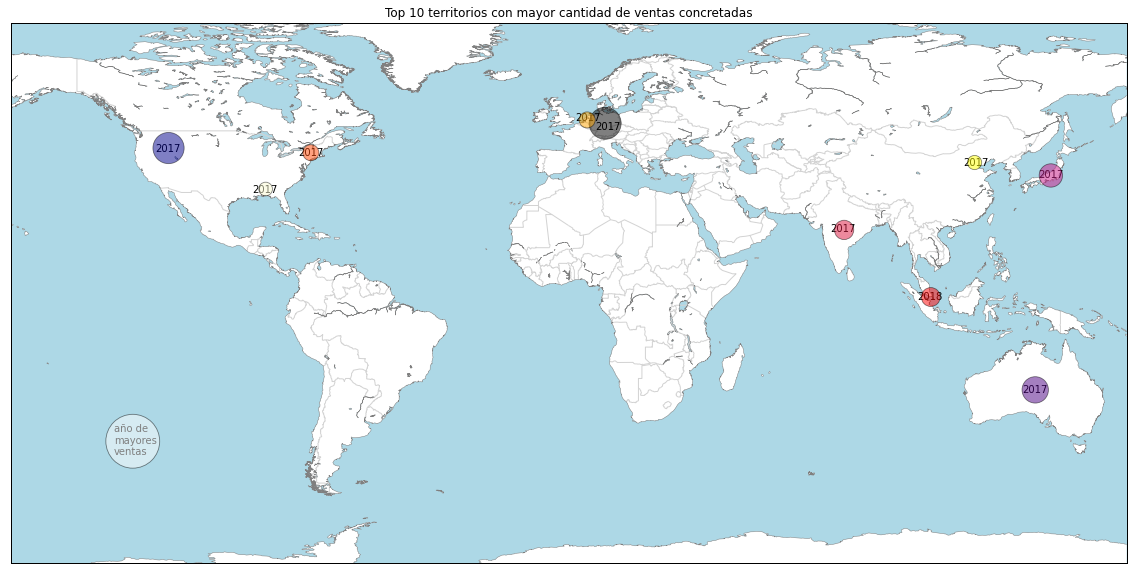

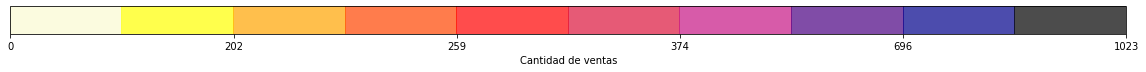

In [198]:
coordenadas = {  'llcrnrlon': -160,
                 'llcrnrlat': -75,
                 'urcrnrlon': 160,
                 'urcrnrlat': 80}

fig, ax = plt.subplots( 1,1, figsize=(20,14))
m = Basemap(ax=ax , 
            resolution='l',   
            **coordenadas  )
span = 10

m.drawcountries(color='lightgray', linewidth=1)
m.drawcoastlines(color='gray', linewidth=0.5)
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='white',lake_color='lightblue')

ax.set_title('Top 10 territorios con mayor cantidad de ventas concretadas')

data = pd.DataFrame({
'lat':[10.451526, -114.742043, 133.775136, 138.252924, 78.96288, 103.819836, -73.935242, 5.291266, 116.383331,  -86.902298, -125],
'lon':[51.165691, 44.068203, -25.274398, 36.204824, 20.593684, 1.352083, 42.730610, 52.132633, 39.916668, 32.318230, -40],
'name':['Germany', 'NW America', 'Australia', 'Japan', 'India', 'Singapore', 'NE America', 'Netherlands', 'China (PRC)', 'SE America','Circle'],
'size':[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 2900.0],
'color':['black', 'darkblue', 'indigo', 'mediumvioletred','crimson', 'red', 'OrangeRed', 'orange', 'yellow', 'LightGoldenrodYellow', 'white'],
})
 
plt.text( -90.602298, 31.318230,'2017', size=10, color='black' )
plt.text( 113, 39,'2017', size=10, color='black' )
plt.text( 2, 52,'2017', size=10, color='black' )
plt.text( -77.5, 42,'2017', size=10, color='black' )
plt.text( 100, 0.5,'2018', size=10, color='black' )
plt.text( 75, 20,'2017', size=10, color='black' )
plt.text( 134.75, 35.5,'2017', size=10, color='black' )
plt.text( 130, -26,'2017', size=10, color='black' )
plt.text( -118.5, 43,'2017', size=10, color='black' )
plt.text( 7.6, 49.5,'2017', size=10, color='black' )


plt.text( -130.45, -35,'año de\nmayores\nventas', ha='left', va='top', size=10, color='black' )

sc = ax.scatter(data['lat'], data['lon'], visu_final['Cant'] , c=data['color'] ,  zorder=10 , alpha=0.5 , linewidths=0.8, edgecolors='black' )

import matplotlib as mpl

fig, ax = plt.subplots(figsize=(20, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(['LightGoldenrodYellow', 'yellow',
                                  'orange', 'OrangeRed', 'red','crimson','mediumvioletred','indigo','darkblue', 'Black'])
bounds = [0, 187, 202, 257, 259, 357, 374, 546, 696, 973, 1023]
norm = mpl.colors.BoundaryNorm(bounds, 11)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal', spacing='uniform', alpha=0.7)
cb2.set_label("Cantidad de ventas")
fig.show()

